<a href="https://colab.research.google.com/github/krismohan69/AIML/blob/master/Experiment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

The objective of this experiment is to understand how to apply k-fold cross-validation method on the MNIST datasets and then tune the hyper parameters of MLP Classifier.

In this experiment we will be using MNIST database. The MNIST database is a dataset of handwritten digits. It has 60,000 training samples, and 10,000 test samples. Each image is represented by 28 x 28 pixels, each containing a value 0 - 255 with its gray scale value.

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

#### Expected time : 30mins

In [0]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="500" height="300" controls>
  <source src="https://cdn.talentsprint.com/talentsprint/archives/sc/aiml/aiml_2018_blr_b6/cfus/week_8/module_2_week_8_experment_5.mp4" type="video/mp4">
</video>
""")

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181901546" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9900255500" #@param {type:"string"}


In [14]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="BLR_M2W8_SAT_EXP_5" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
   
   print ("Setup completed successfully")
   return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "id" : Id, "file_hash" : file_hash, "notebook" : notebook}

      r = requests.post(url, data = data)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", datetime.datetime.now().date().strftime("%d %b %Y"))
      print("Time of submission: ", datetime.datetime.now().time().strftime("%H:%M:%S"))
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [0]:
## Importing required packages
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

Loading the dataset from sklearn package

In [0]:
## Loading MNIST dataset from sklearn
digits = datasets.load_digits(n_class=10)
## Loding the data and storing in x
X = digits.data
## Loading the target data and storing it in y
y = digits.target

In [0]:
### hyper parameters
# activation
a = ["identity","logistic","tanh","relu"]
#solvers
s = ["lbfgs","sgd","adam"]
#learning rate
lr = [0.0001,0.001,0.01,0.1]
#hidden layers
h = [(5,2),(3,2),(6,3),(7,2)]

In [0]:
## Applying K-Folds cross-validator
kf = KFold(n_splits=4)

In [0]:
#function to Create MLP classifier object with hyper parameters
def mlp(a,s,h,lr):
    clf = MLPClassifier(activation= a ,solver= s ,hidden_layer_sizes = h,max_iter = 5000 ,learning_rate = 'constant',learning_rate_init=lr)
    return clf  
#function to calculate the accuracy
def accuracy(actual,predicted):
    return np.count_nonzero(actual == predicted)*1.0/len(actual)

#### Exercise 1

Predict the values using test data and calculate the accuracy

In [27]:
test_accuracy = []
train_accuracy = []
for i in range(10):
    k1 = np.random.randint(0,len(a))
    k2 = np.random.randint(0,len(s))
    k3 = np.random.randint(0,len(lr))
    k4 = np.random.randint(0,len(h))
    print("\nHyper-parameters = \n activation = ", a[k1],    "\n solver = ", s[k2], "\n learning_rate_init = ", lr[k3],         "\n hidden_layer_sizes = ", h[k4])
     #calling the mlp function with random hyper paramters
    clf = mlp(a[k1],s[k2],h[k4],lr[k3])
    tempTrain = 0
    tempTest = 0
    for train_index, test_index in kf.split(X):
        ## Splitting the data into train and test
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test  = y[train_index], y[test_index]
        ##fit the data into the model
        clf.fit(X_train,Y_train)
        ##predicting the values on the fitted model using train data
        predTrain = clf.predict((X_train))
        #adding the accuracy
        tempTrain = tempTrain + accuracy(Y_train,predTrain)
        ##predict the values on the fitted model using test data
        predTest = clf.predict((X_test))
        #adding the accuracy
        tempTest = tempTest + accuracy(Y_test,predTest)
    ##Calculating the train accuracy
    train_accuracy.append(tempTrain*1.0/4)
    ##Calculating the test accuracy
    test_accuracy.append(tempTest*1.0/4)
    print("(train,test) accuracy = ",tempTrain*1.0/4, tempTest*1.0/4)


Hyper-parameters = 
 activation =  identity 
 solver =  sgd 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (3, 2)
(train,test) accuracy =  0.731587834488775 0.6566456322692403

Hyper-parameters = 
 activation =  relu 
 solver =  sgd 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (6, 3)
(train,test) accuracy =  0.35077248815369466 0.3116159366493442

Hyper-parameters = 
 activation =  logistic 
 solver =  adam 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (3, 2)
(train,test) accuracy =  0.4594901517604788 0.400617421430339

Hyper-parameters = 
 activation =  logistic 
 solver =  adam 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (7, 2)
(train,test) accuracy =  0.41046126241631586 0.3601373422420193

Hyper-parameters = 
 activation =  tanh 
 solver =  sgd 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (6, 3)
(train,test) accuracy =  0.7510384104472188 0.6633828260331601

Hyper-parameters = 
 activation =  tanh 
 solver =  sgd 
 learning_rate_init = 

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_base.py:91

(train,test) accuracy =  0.09905364487298954 0.09905097748082159


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


#### PLotting the data

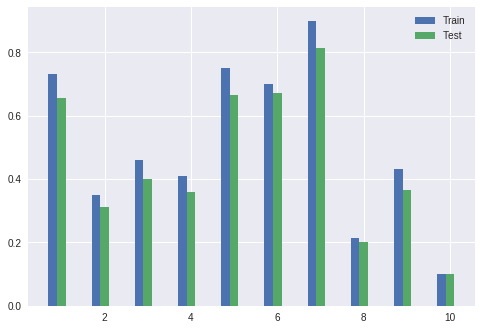

In [28]:
##Plotting the data
xx = np.array(range(1,11))
plt.bar(xx-0.2,train_accuracy,width=0.2)
plt.bar(xx, test_accuracy,width=0.2)
plt.legend(["Train","Test"])
plt.show()

## Applying K-Folds cross-validator
kf = KFold(n_splits=3)\\#### Exercise 2

Vary the number of k-fold splits and observe the changes

In [0]:
## Applying K-Folds cross-validator
kf = KFold(n_splits=5)

In [0]:
#function to Create MLP classifier object with hyper parameters
def mlp(a,s,h,lr):
    clf = MLPClassifier(activation= a ,solver= s ,hidden_layer_sizes = h,max_iter = 10000 ,learning_rate = 'constant',learning_rate_init=lr)
    return clf  
#function to calculate the accuracy
def accuracy(actual,predicted):
    return np.count_nonzero(actual == predicted)*1.0/len(actual)

In [34]:
test_accuracy = []
train_accuracy = []
for i in range(10):
    k1 = np.random.randint(0,len(a))
    k2 = np.random.randint(0,len(s))
    k3 = np.random.randint(0,len(lr))
    k4 = np.random.randint(0,len(h))
    print("\nHyper-parameters = \n activation = ", a[k1],    "\n solver = ", s[k2], "\n learning_rate_init = ", lr[k3],         "\n hidden_layer_sizes = ", h[k4])
     #calling the mlp function with random hyper paramters
    clf = mlp(a[k1],s[k2],h[k4],lr[k3])
    tempTrain = 0
    tempTest = 0
    for train_index, test_index in kf.split(X):
        ## Splitting the data into train and test
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test  = y[train_index], y[test_index]
        ##fit the data into the model
        clf.fit(X_train,Y_train)
        ##predicting the values on the fitted model using train data
        predTrain = clf.predict((X_train))
        #adding the accuracy
        tempTrain = tempTrain + accuracy(Y_train,predTrain)
        ##predict the values on the fitted model using test data
        predTest = clf.predict((X_test))
        #adding the accuracy
        tempTest = tempTest + accuracy(Y_test,predTest)
    ##Calculating the train accuracy
    train_accuracy.append(tempTrain*1.0/5)
    ##Calculating the test accuracy
    test_accuracy.append(tempTest*1.0/5)
    print("(train,test) accuracy = ",tempTrain*1.0/3, tempTest*1.0/3)


Hyper-parameters = 
 activation =  tanh 
 solver =  adam 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (5, 2)
(train,test) accuracy =  0.3553144129104062 0.3350027824151363

Hyper-parameters = 
 activation =  identity 
 solver =  lbfgs 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (5, 2)
(train,test) accuracy =  0.8235948803561491 0.7200890372843629

Hyper-parameters = 
 activation =  identity 
 solver =  adam 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (6, 3)
(train,test) accuracy =  0.9318308291597107 0.8085698386199222

Hyper-parameters = 
 activation =  logistic 
 solver =  adam 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (6, 3)
(train,test) accuracy =  0.9493600445186422 0.7679465776293822

Hyper-parameters = 
 activation =  relu 
 solver =  adam 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (3, 2)
(train,test) accuracy =  0.4181969949916528 0.38452977184195886

Hyper-parameters = 
 activation =  relu 
 solver =  lbfgs 
 learning_rate_init

### Please answer the questions below to complete the experiment:

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "test" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [39]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 8336
Date of submission:  05 Jan 2019
Time of submission:  12:47:59
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
